@author: spe

This example covers calculating the forces in a two-color type-II
three-dimensional MOT.  This example is based on Fig. 1 of PRA 92 053401.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as cts
import pylcp
import pylcp.tools

Let's build the example of $F=2 \rightarrow F'=1$ with $g_l=1$ and $g_u=0$:

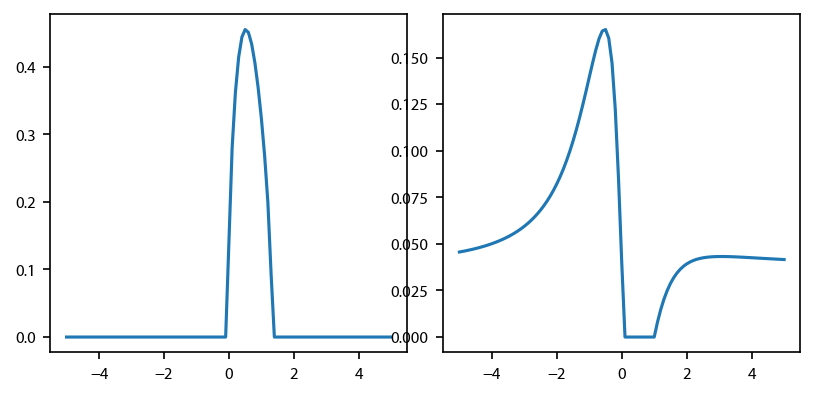

In [2]:
# Case 1: F=1 -> F=2
Hg, Bgq = pylcp.hamiltonians.singleF(F=2, gF=0.5, muB=1)
He, Beq = pylcp.hamiltonians.singleF(F=1, gF=0, muB=1)

dijq = pylcp.hamiltonians.dqij_two_bare_hyperfine(2, 1)

# Define the full Hamiltonian:
hamiltonian = pylcp.hamiltonian(Hg, He, Bgq, Beq, dijq)

# Define the magnetic field:
magField = lambda R: pylcp.tools.quadrupoleField3D(R, 1)

# Define the detunings:
dets = np.linspace(-5, 5, 101)
beta = 3.6

# The red detuned beams are constant in this calculation, so let's make that
# collections once:
r_beams = pylcp.tools.standard_six_beam_MOT(delta=-1, beta=beta, pol=+1)

it = np.nditer([dets, None, None])
for (det_i, omega_i, beta_i) in it:
    # Make the blue-detued beams:
    b_beams = pylcp.tools.standard_six_beam_MOT(delta=det_i, beta=beta, pol=-1)
    all_beams = pylcp.laserBeams(b_beams.beam_vector + r_beams.beam_vector)

    trap = pylcp.trap_rateeq(all_beams, magField, hamiltonian)
    omega_i[...] = trap.trapping_frequencies(axes=[2], eps=0.02)
    beta_i[...] = trap.damping_coeff(axes=[2], eps=0.02)

fig, ax = plt.subplots(1, 2, figsize=(6.25, 2.75))
ax[0].plot(dets, it.operands[1])
ax[1].plot(dets, it.operands[2])